In [1]:
# 3_4_groupby_challenges.ipynb
# 3_5_quality_assessment_challenge.ipynb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

products = pd.read_csv('~/Documents/datacamp/WBS-School/eniac_products.csv')
orders = pd.read_csv('~/Documents/datacamp/WBS-School/eniac_orders.csv')
orderlines = pd.read_csv('~/Documents/datacamp/WBS-School/eniac_orderlines.csv')
brands = pd.read_csv('~/Documents/datacamp/WBS-School/eniac_brands.csv')

In [3]:
# set display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [43]:
products.info()
products.head(5)

products['sku'] = products['sku'].astype('string')
products['type'] = pd.to_numeric(products['type'],errors='coerce')

products.fillna({'desc':''},inplace=True)
products.fillna({'price':0},inplace=True)
products.fillna({'type':0},inplace=True) 


# products['price'] = (products['price'].str.split()).apply(lambda x: str(x[0].replace('.', '')))
products['price'] = pd.to_numeric(products['price'],errors='coerce')
products.fillna({'promo_price':0},inplace=True)
products['promo_price'] = pd.to_numeric(products['promo_price'],errors='coerce')

products.info()
pr_df = products.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          19326 non-null  string 
 1   name         19326 non-null  object 
 2   desc         19326 non-null  object 
 3   price        18895 non-null  float64
 4   promo_price  6424 non-null   float64
 5   in_stock     19326 non-null  int64  
 6   type         19326 non-null  float64
dtypes: float64(3), int64(1), object(2), string(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          19326 non-null  string 
 1   name         19326 non-null  object 
 2   desc         19326 non-null  object 
 3   price        19326 non-null  float64
 4   promo_price  19326 non-null  float64
 5   in_stock     19326 non-null  int64

In [ ]:
# display(products.groupby(['sku','name'])['sku'].nunique())

In [6]:
# use pd.reset_index.rename to rename
# df.reset_index().rename(columns={df.index.name:'bar'})

# df.index.name = 'bar'
# df.rename_axis('bar').reset_index()


In [7]:
brands.info()
display(brands.head(5))
brands[brands['short']=='APP']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


,short,long
7,APP,Apple


In [208]:
# conver date to datetime
orders['created_date'] = pd.to_datetime(orders['created_date'])
orders.isna().sum()
orders.fillna({'total_paid':0},inplace=True)
display(orders['state'].value_counts())
orders.head(5)

or_df = orders.copy()
or_df.rename(columns={"order_id": "id_order"},inplace=True)
or_df['id_order'] = or_df['id_order'].astype('string')
or_df.info()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: state, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_order      226909 non-null  string        
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226909 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1), string(1)
memory usage: 6.9+ MB


In [207]:


# orderlines.isna().sum()

# convert unit_price to float
orderlines['unit_price'] = pd.to_numeric(orderlines['unit_price'],errors='coerce')
orderlines.fillna({'unit_price':0},inplace=True)
# conver date to datetime
orderlines['date'] = pd.to_datetime(orderlines['date'])
orderlines.info()
orderlines['id_order'] = orderlines['id_order'].astype('string')



orderlines.head(5)
ol_df = orderlines.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 15.7+ MB


In [10]:

# ol_df["date"] = pd.to_datetime(ol_df["date"])

# ol_df.info()


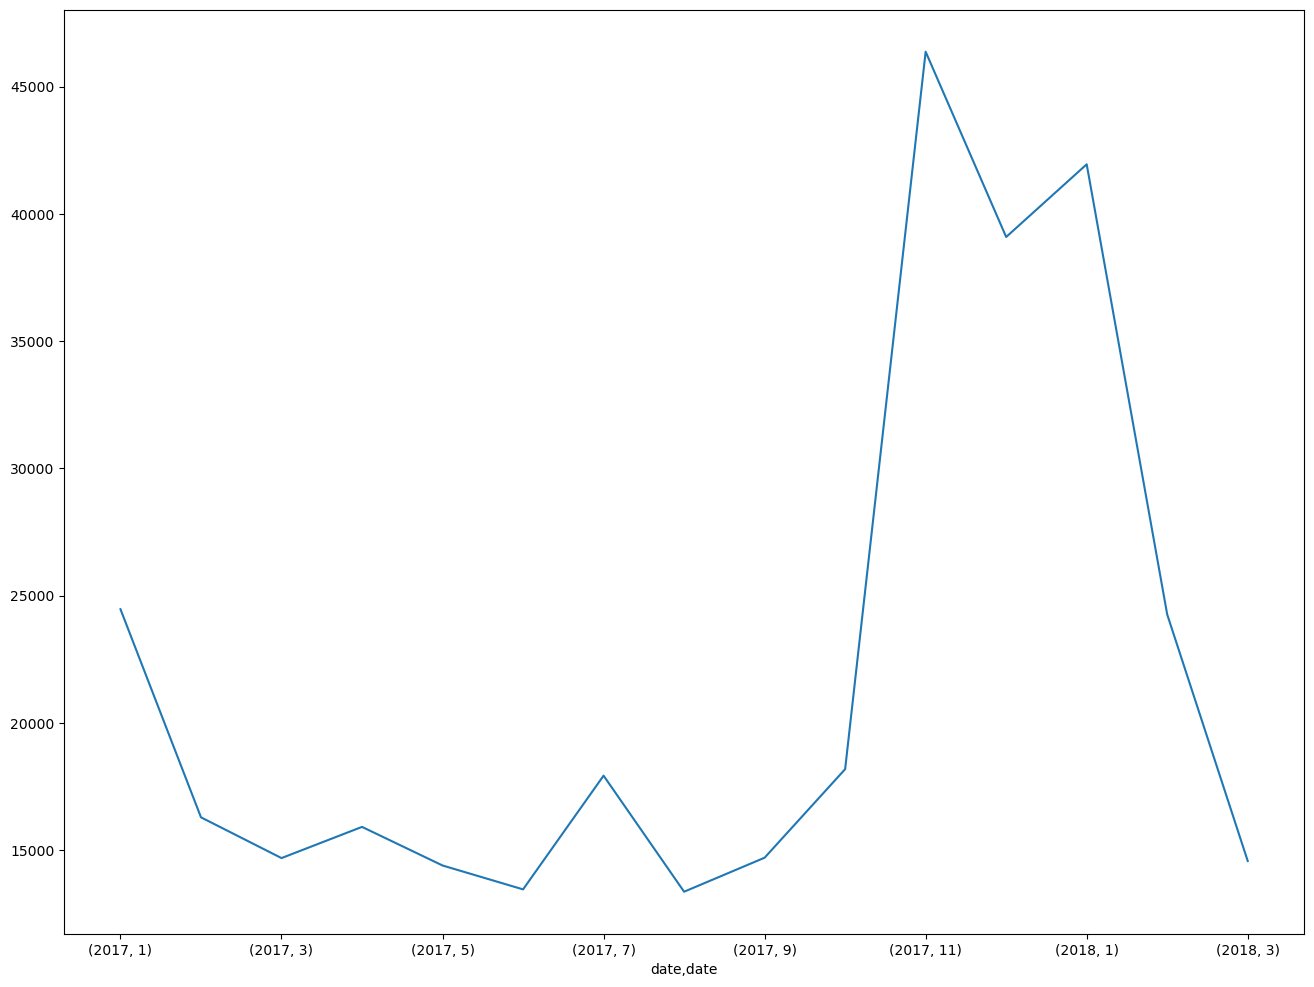

In [11]:
(
    ol_df.groupby([ol_df["date"].dt.year, 
                   ol_df["date"].dt.month])["product_quantity"]
    .sum()
    .plot(figsize=(16, 12))
);

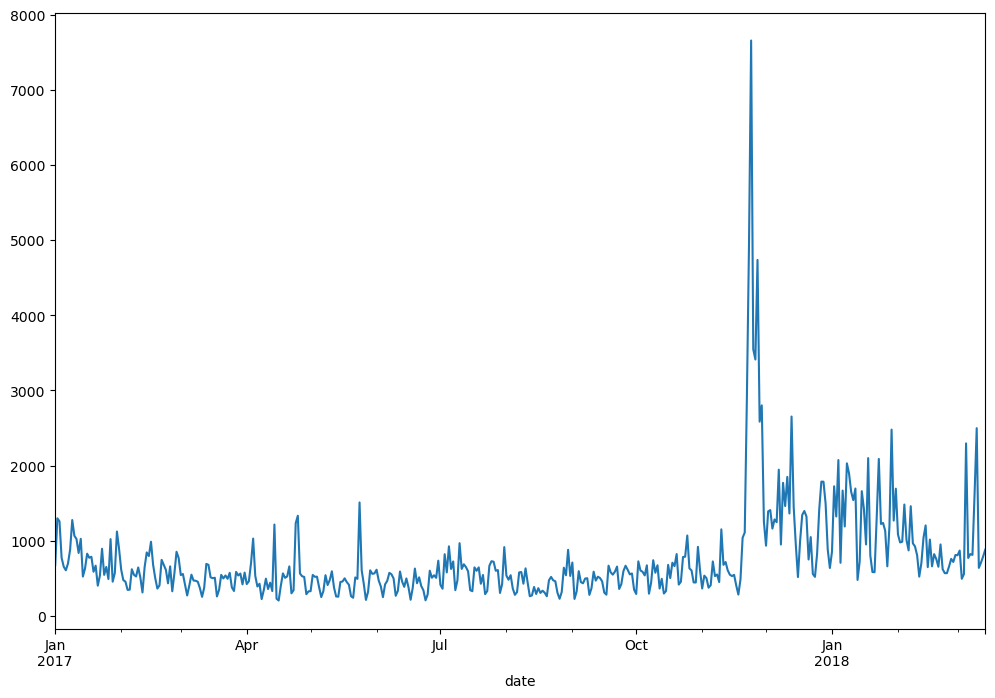

In [12]:
(
    ol_df
    .resample("D", on="date")
    .sum()["product_quantity"]
    .plot(figsize=(12, 8))
 );

In [ ]:
# plot orders
# https://stackoverflow.com/questions/61341988/is-there-a-way-pairplots-could-include-objects-dtypes-variables
# sns.pairplot(products,hue='sku')
# sns.pairplot(or_df)

ax = or_df.plot.bar(y='total_paid')
ax.set_xticklabels(or_df['state'])

plt.show()

In [20]:
# ol_df
#     .groupby("sku")
#     .agg({"product_quantity": ["sum", "count"], "unit_price": "mean"})
#     .nlargest(10, ("product_quantity", "sum"))
print(ol_df.loc[ol_df['sku']=='8MO0007'].count()['sku'])
print(ol_df.loc[ol_df['sku']=='8MO0001-A'].count()['sku'])

29
2


In [19]:
ol_df.groupby(['sku','product_quantity']).agg({"product_quantity": ["sum", "count"], "unit_price": "mean"})

product_quantity       unit_price
                                        sum count       mean
sku       product_quantity                                  
8MO0001-A 1                               2     2      12.96
8MO0003-A 1                               3     3      12.85
8MO0007   1                              28    28      21.42
          2                               2     1      19.99
8MO0008   1                              29    29      21.78
...                                     ...   ...        ...
ZAG0042   1                               1     1      19.99
ZEP0007   1                               5     5     137.12
ZEP0008   1                               1     1     104.12
par0072   1                              11    11     225.45
          2                               2     1     209.99

[12567 rows x 3 columns]

In [21]:
(
ol_df.groupby([ol_df["date"].dt.year, 
                   ol_df["date"].dt.month])
    .agg({"product_quantity": sum})
)

product_quantity
date date                  
2017 1                24465
     2                16285
     3                14683
     4                15909
     5                14392
     6                13453
     7                17923
     8                13361
     9                14698
     10               18178
     11               46375
     12               39094
2018 1                41950
     2                24257
     3                14569

In [23]:
## 3.4 Challenge 1. What are the top 8 most sold products?
(
    ol_df.groupby('sku').agg({"product_quantity": sum})
    .sort_values(by='product_quantity',ascending=False)
    .head(8)
)

,product_quantity
sku,
APP1190,6366
MIC0036,6316
APP1216,5648
APP0662,5487
APP0663,4164
MMW0016,2615
APP0698,2348
SAT0054,2322


In [25]:
## 3.4 Challenge 2. How many products did each of the 5 largest orders contain?
(
    ol_df.groupby(['id_order']).agg({"product_quantity": sum})
    .sort_values(by='product_quantity',ascending=False)
    .head(5)
)

,product_quantity
id_order,
358747,1081
346221,999
349475,800
349133,555
484334,264


id_order  date               
505422    2018-02-04 12:07:50    12
471130    2017-12-25 12:42:16    12
505423    2018-02-04 12:07:53    12
471132    2017-12-25 12:42:22    12
471131    2017-12-25 12:42:18    12
                                 ..
372850    2017-07-05 12:05:02     1
372853    2017-07-05 12:10:03     1
372854    2017-07-05 12:10:18     1
372855    2017-07-05 12:10:40     1
527401    2018-03-14 13:58:36     1
Name: date, Length: 253957, dtype: int64

<AxesSubplot:xlabel='date'>

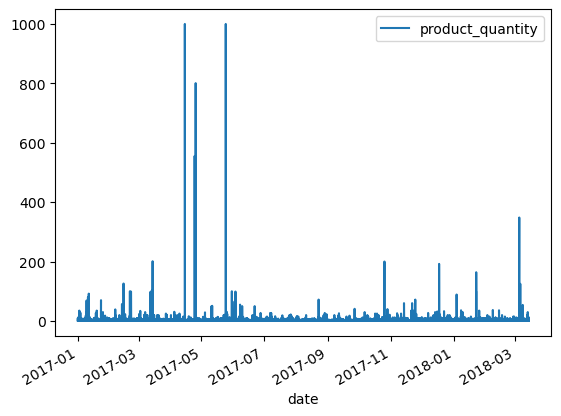

In [26]:
## 3.4 Challenge 3. We want to see how busy the days of the week are to know when we need more staff. 
## Rank the days of the week from busiest to least busiest. 
## Bonus points for using your pandas plotting skills.
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.resample.html
display(ol_df.groupby(['id_order'])['date'].value_counts().sort_values(ascending=False))
ol_df.groupby('date').agg({"product_quantity": sum}).plot()


In [61]:
## 3.4 Challenge 4. Which brands sell the most products?

# https://stackoverflow.com/questions/27313647/merging-two-pandas-dataframes-results-in-duplicate-columns
# pr_df.brands new column based on sku.short
pr_df.loc[pr_df['sku'].str[:3].isin(list(brands['short'])),'short'] = pr_df['sku'].str[:3]

# join left product, brands
pr_br_df = pr_df.merge(brands,on='short',how='left')
# join right products+brands, orderlines
pr_br_ol_df = pr_br_df.merge(ol_df,on='sku',how='right')
    
# placeholder table
pr_br_df.info()
pr_br_ol_df.info()

display(pr_br_df.loc[pr_br_df['short'].isna()].head(5))
display(pr_br_ol_df.loc[pr_br_ol_df['promo_price'].isna()].head(5))

# print(pr_br_df.isna().value_counts())
# print(pr_br_ol_df.isna().value_counts())
# display(pr_br_df.head(3))
# display(pr_br_ol_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19326 entries, 0 to 19325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          19326 non-null  string 
 1   name         19326 non-null  object 
 2   desc         19326 non-null  object 
 3   price        19326 non-null  float64
 4   promo_price  19326 non-null  float64
 5   in_stock     19326 non-null  int64  
 6   type         19326 non-null  float64
 7   short        19115 non-null  object 
 8   long         19115 non-null  object 
dtypes: float64(3), int64(1), object(4), string(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141574 entries, 0 to 141573
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sku               141574 non-null  object        
 1   name              141018 non-null  object        
 2   desc              141

,sku,name,desc,price,promo_price,in_stock,type,short,long
11,SEN0021,Sennheiser CX 300-II Precision headphones iPho...,Headphones iPhone iPad iPad 2 iPad 3 and iPod.,49.99,449.88,0,5384.00,<NA>,NaN
23,MOB0007,Mobee Magic Charger Charger Magic Mouse,Wireless Charger for Magic Mouse,49.99,499.85,0,12355400.00,<NA>,NaN
27,OND0069,Adapter mini DVI to HDMI,Adapter mini DVI to HDMI for Mac and PC,16.49,149.90,0,1325.00,<NA>,NaN
30,OND0073,Mini DisplayPort to HDMI Cable 18m,Cable with Mini DisplayPort to HDMI (audio + v...,22.99,169.90,0,1325.00,<NA>,NaN
45,MOB0009,Mobee Magic Numpad for the Magic Trackpad,3 Numeric for Magic Trackpad stickers.,29.49,279.87,0,12355400.00,<NA>,NaN


,sku,name,desc,price,promo_price,in_stock,type,short,long,id,id_order,product_id,product_quantity,unit_price,date,valid_sku,valid_ord,unit_price_total
86,SYN0127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119316,299638,0,1,223.24,2017-01-01 11:56:18,False,True,223.24
142,EVU0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119477,299706,0,1,28.49,2017-01-01 13:57:16,False,True,28.49
146,APP0608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119494,299712,0,1,279.99,2017-01-01 14:10:47,False,True,279.99
319,SYN0127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120084,300029,0,1,223.24,2017-01-01 22:00:19,False,True,223.24
418,APP0608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120534,300251,0,1,279.99,2017-01-02 07:48:49,False,True,279.99


In [86]:
# add column brand to pr_df
pr_df.loc[pr_df['short']==pr_br_df['short'],'brand'] = pr_br_df['long']
# pr_df.head(10)

<AxesSubplot:xlabel='short'>

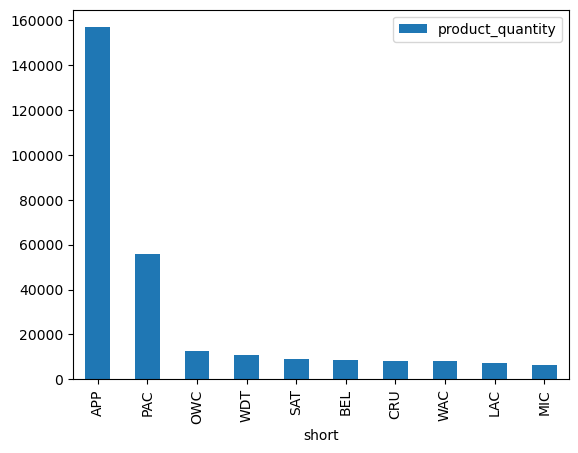

In [50]:
(# pr_df gropuby brands qty.sum
    pr_br_ol_df.groupby('short').agg({'product_quantity':sum})
    .sort_values(by='product_quantity',ascending=False)
    .nlargest(10,'product_quantity')
    .plot.bar()
)

In [ ]:
# remove duplicate product.columns
# https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
# df = df.loc[:,~df.columns.duplicated()].copy()

# pr_df = pr_df.loc[:,~pr_df.columns.duplicated()].copy()
# pr_df.info()
# pr_df.head(3)

In [ ]:
# rename product.long -> brand
# pr_df = pr_df.rename({'long_y':'brand'},axis=1)

# pr_df = pr_df.drop('long_y',axis=1)
        
# pr_df.info()
# pr_df = pr_df.rename({'long_x':'brand'},axis=1)



<AxesSubplot:xlabel='date'>

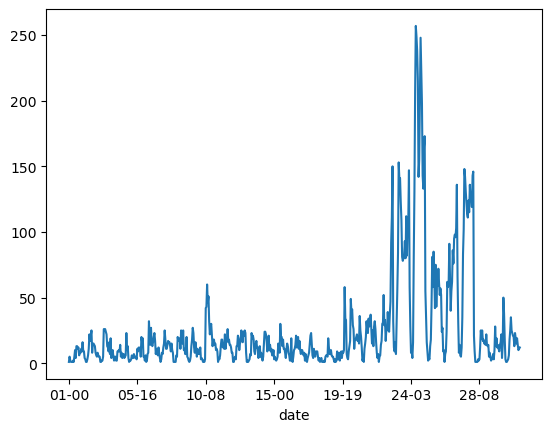

In [77]:
## 3.4 Challenge 5. Plot a line chart for the amount of orders each hour of November 2017
(
    # ol_df.loc[(ol_df.date.dt.year==2017)&(ol_df.date.dt.month==11)]
    ol_df.loc[(ol_df.date.dt.strftime('%Y-%m') == '2017-11')]
    # .groupby(ol_df.date.dt.strftime('%b-%d-%H'))
    .groupby(ol_df.date.dt.strftime('%d-%H'))
    .id_order.count()
    .plot.line()
)

In [ ]:
# Data quality
# 3.5 ## 1. Define Pandas display
# import pandas as pd
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_rows', 1000)

In [29]:
# 3.5 ## 2. Exclude unwanted orders

# 2.1 remove cancelled and shopping basket
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

or_df = or_df.drop(or_df.loc[or_df['state']=='Shopping Basket'].index)
or_df = or_df.drop(or_df.loc[or_df['state']=='Cancelled'].index)
# display(or_df['state'].unique())

In [30]:
# 3.5 ## 3. Exclude orders with unknown products

# mark orderlines exist in products
ol_df.loc[ol_df['sku'].isin(list(pr_df['sku'])),'valid_sku'] = True
ol_df.loc[~ol_df['sku'].isin(list(pr_df['sku'])),'valid_sku'] = False
display(ol_df['valid_sku'].count())

# count orderlines.sku not exist in products
display(ol_df.loc[ol_df['valid_sku']==False].count())

(# test : orders not in orderlines by id, assert: empty
     or_df
    .loc[~(or_df['id_order'].isin(list(ol_df['id_order'])))].count()
)



293983

id                  1418
id_order            1418
product_id          1418
product_quantity    1418
sku                 1418
unit_price          1418
date                1418
valid_sku           1418
dtype: int64

id_order        12362
created_date    12362
total_paid      12362
state           12362
dtype: int64

In [31]:
# 3.5

# 2.2 orderlines –> Keep only orderlines exist in orders.
# ol_or_df = merge orderline, orders on sku
# ol_or_df = ol_df.merge(or_df,on='id_order',how='inner')
# ol_df.info()
# or_df.info()

# new column in ol and or for invalid orders
# or_df.loc[or_df['id_order'].isin(list(ol_or_df['id_order'])),'valid'] = True
# or_df.loc[~or_df['id_order'].isin(list(ol_or_df['id_order'])),'valid'] = False
# ol_df.loc[ol_df['id_order'].isin(list(ol_or_df['id_order'])),'valid'] = True
# ol_df.loc[~ol_df['id_order'].isin(list(ol_or_df['id_order'])),'valid'] = False



# 2.3 orders –> Keep only orders exist in orderlines.
or_df.loc[or_df['id_order'].isin(list(ol_df['id_order'])),'valid_ord'] = True
or_df.loc[~or_df['id_order'].isin(list(ol_df['id_order'])),'valid_ord'] = False
ol_df.loc[ol_df['id_order'].isin(list(or_df['id_order'])),'valid_ord'] = True
ol_df.loc[~ol_df['id_order'].isin(list(or_df['id_order'])),'valid_ord'] = False



# verify both methods (merge vs slice) return same results
# test: valid and valid_ord columns have the same values, assert: empty cells
# display(ol_df.loc[ol_df['valid']!=ol_df['valid_ord']])
# display(or_df.loc[or_df['valid']!=or_df['valid_ord']])



In [32]:

# drop
# orderlines -> drop if sku does not exist in products (ol.valid3)
# orders -> drop if orderid does not exist in orderlines (or.valid2)
# orderlines -> drop if orderid does not exist in orders (ol.valid2)
ol_df.drop(ol_df.loc[ol_df['valid_sku']==False].index)

# drop order rows where valid == False
# or_df = or_df.drop(or_df.loc[or_df['valid']==False].index)
# ol_df = ol_df.drop(ol_df.loc[ol_df['valid']==False].index)
or_df = or_df.drop(or_df.loc[or_df['valid_ord']==False].index)
ol_df = ol_df.drop(ol_df.loc[ol_df['valid_ord']==False].index)


In [87]:

display(or_df['valid_ord'].unique())
display(ol_df['valid_ord'].unique())
display(ol_df['valid_sku'].unique())
or_df.info()
ol_df.info()



display(or_df.head(3))
display(ol_df.head(3))
display(pr_df.head(3))


array([True], dtype=object)

array([True], dtype=object)

array([True, False], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89505 entries, 1 to 226908
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_order      89505 non-null  int64         
 1   created_date  89505 non-null  datetime64[ns]
 2   total_paid    89505 non-null  float64       
 3   state         89505 non-null  object        
 4   valid_ord     89505 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115267 entries, 7 to 293982
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                115267 non-null  int64         
 1   id_order          115267 non-null  int64         
 2   product_id        115267 non-null  int64         
 3   product_quantity  115267 non-null  int64         
 4   sku           

,id_order,created_date,total_paid,state,valid_ord
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True


,id,id_order,product_id,product_quantity,sku,unit_price,date,valid_sku,valid_ord,unit_price_total
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,True,True,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,True,True,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,True,True,72.19


,sku,name,desc,price,promo_price,in_stock,type,short,brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.90,1,8696.00,RAI,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,590.00,0,13855401.00,APP,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.90,0,1387.00,APP,Apple


In [94]:
# manual testing
# orphaned products
# print(ol_df.isna().value_counts())
# print(or_df.isna().value_counts())
# print(pr_df.isna().value_counts())

# display(pr_df.loc[(pr_df['type']==0) & (pr_df['in_stock']>0)].head(3))
display(pr_df[pr_df['sku']=='STC0007'])
display(ol_df[ol_df['sku']=='STC0007']) 

## note: 
# promo price not applied on this orderline
# orderlines should annotate if promo is applied 
# maybe separate promo table from products, remove promo price from products
# promo table contain product items with added promo_price, promo_code, date, price, sku
# apply promo price based on order/orderline condition (date, etc)

,sku,name,desc,price,promo_price,in_stock,type,short,brand
15691,STC0007,Stacked Speed ​​Case Bundle Case iPhone wirele...,Wireless charging cover with 2000mAh battery +...,99.99,715.30,1,0.00,STC,Stacked


,id,id_order,product_id,product_quantity,sku,unit_price,date,valid_sku,valid_ord,unit_price_total
79640,1273230,368133,0,1,STC0007,94.99,2017-06-22 13:17:12,True,True,94.99


In [210]:
# manual testing
# orphaned orderlines
display(pr_df[pr_df['sku']=='APP1582'])
display(ol_df[ol_df['sku']=='APP1582'].head(5))
display(or_df.loc[(or_df['id_order']=='302050')].head(5)) ## exists in orderline but not in order
display(ol_df.loc[ol_df['id_order']=='302050'].head(5))

display(or_df.loc[(or_df['id_order']=='299634')].head(5)) ## exists in orderline but not in order



,sku,name,desc,price,promo_price,in_stock,type,short,brand
12209,APP1582,"Apple MacBook Air 13 ""i7 22 Ghz | 8GB RAM | 12...",laptop MacBook Air 13 inch i7 22GHz 8GB RAM 12...,1219.00,0.00,0,1282.00,APP,Apple


,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119115,299544,0,1,APP1582,0.00,2017-01-01 01:17:21
2761,1125963,302038,0,1,APP1582,0.00,2017-01-03 21:27:10
2775,1126354,302050,0,1,APP1582,0.00,2017-01-03 21:43:12
3329,1130117,302584,0,1,APP1582,0.00,2017-01-04 16:44:55
3467,1130359,302718,0,1,APP1582,0.00,2017-01-04 19:59:34


,id_order,created_date,total_paid,state
2592,302050,2017-01-03 21:43:12,1137.99,Place Order


,id,id_order,product_id,product_quantity,sku,unit_price,date
2775,1126354,302050,0,1,APP1582,0.00,2017-01-03 21:43:12


,id_order,created_date,total_paid,state
292,299634,2017-01-01 12:34:20,825.51,Completed


In [265]:
# 3.5 ## 4. Explore the revenue from different tables
# compare orders.total_paid with orderlines.unit_price_total

# 3.5 #### Step 1:
# Create the `orderlines.unit_price_total` <- `orderlines.unit_price` * `orderlines.product_quantity `

ol_df.loc[:,'unit_price_total'] = ol_df['unit_price'] * ol_df['product_quantity']


ol_df.loc[ol_df['product_quantity']>1].head(3)




,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27,2317.90
10,1119125,299548,0,5,SPE0132,35.14,2017-01-01 02:02:20,175.70
20,1119136,299558,0,2,WDT0141,112.99,2017-01-01 02:24:33,225.98


In [266]:
# 3.5 #### Step 2: 
# Group by orderlines`order_id`, summarising by the sum of `unit_price_total`

(
    ol_df.groupby('id_order').agg({'unit_price_total':'sum'})
    .sort_values(by='unit_price_total',ascending=False)
    .head(10)
)




,unit_price_total
id_order,
464858,99648.00
361853,87021.00
346221,55934.01
523451,42328.99
349133,39399.45
488935,28898.23
391689,27545.76
395611,25707.48
349364,25096.52


In [281]:
# shipping fees
# 3.5 ### What is the average difference between orders[`total_paid`] and orderlines[`unit_price_total`]
# merge or + ol on orderid
ol_or_df = ol_df.merge(or_df,on='id_order',how='inner')


# https://stackoverflow.com/questions/21998354/pandas-wont-fillna-inplace
# ol_or_df.fillna({'total_paid_per_unit_price':0}, inplace=True)
ol_or_df.loc[:,'total_paid_per_unit_total'] = ol_or_df['total_paid'] - ol_or_df['unit_price_total']
# ol_or_df.info()
# display(ol_or_df.isna().count())
# print(ol_or_df['total_paid_per_unit_price'].mean())
# ol_or_df.head(10)
ol_or_df.loc[ol_or_df['total_paid_per_unit_total']<0,'total_paid_per_unit_total'] = 0




In [282]:
(
    ol_or_df.groupby(['id_order','sku','product_quantity','unit_price_total','total_paid'])
    .agg({'total_paid_per_unit_total':'mean'})
    .nlargest(10,'total_paid_per_unit_total')
    
)

total_paid_per_unit_total
id_order sku     product_quantity unit_price_total total_paid                           
395611   APP1003 1                0.00             214747.53                   214747.53
         APP1006 1                0.00             214747.53                   214747.53
         APP1632 1                0.00             214747.53                   214747.53
         APP1882 1                0.00             214747.53                   214747.53
         APP1891 1                0.00             214747.53                   214747.53
         APP1907 1                0.00             214747.53                   214747.53
         APP2018 1                0.00             214747.53                   214747.53
         APP2065 1                0.00             214747.53                   214747.53
         APP2066 1                0.00             214747.53                   214747.53
         APP2072 1                0.00             214747.53                   214747.53

In [269]:
# manual testing correlation between dates - order state

or_df.state.value_counts()
# ol_or_df.query('state == "Pending"').head(3)
ol_or_df.groupby('created_date')[['date']].value_counts().sort_values(ascending=False)

created_date         date               
2018-03-05 10:36:05  2018-03-05 10:36:05    190
2018-03-05 10:36:02  2018-03-05 10:36:02     97
2018-03-05 10:35:54  2018-03-05 10:35:54     75
2018-03-05 10:36:47  2018-03-05 10:36:47     70
2018-03-05 10:36:51  2018-03-05 10:36:51     66
                                           ... 
2017-07-05 18:02:18  2017-07-05 18:02:18      1
2017-07-05 18:03:51  2017-07-05 18:04:17      1
2017-07-05 18:04:44  2017-07-05 17:46:58      1
2017-07-05 18:05:51  2017-07-05 18:00:29      1
2018-03-14 13:58:36  2018-03-14 13:58:36      1
Length: 252796, dtype: int64

<AxesSubplot:ylabel='Frequency'>

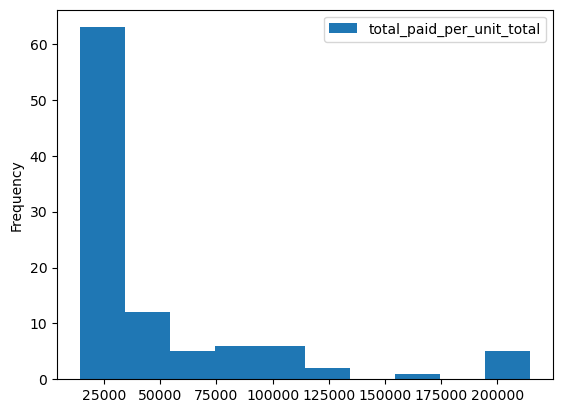

In [283]:
# 3.5 ### What is the distribution of these differences?
# bar plot
(
    ol_or_df.groupby('id_order')
    .agg({'total_paid_per_unit_total':'mean'})
    .nlargest(100,'total_paid_per_unit_total')
    .plot.hist()
)
# note:
# outliers: diff > 14000
# majority : low diff
# apply iqr bar plot

In [284]:
(
    ol_or_df.groupby('id_order')
    .agg({'total_paid_per_unit_total':'mean'})
    .nlargest(10,'total_paid_per_unit_total')
)

,total_paid_per_unit_total
id_order,
301934,214701.60
395611,214647.11
484334,214570.93
340045,213587.98
361200,213013.80
331780,159989.83
488935,120966.11
359031,117142.18
367220,101210.17


In [286]:
# need to look at high diff orders (what is causing disparaty, qty/delivery fees/tax,etc)

(
    ol_or_df.loc[(ol_or_df['total_paid_per_unit_total']>30000)][['id_order','product_quantity','sku','unit_price','unit_price_total','total_paid','total_paid_per_unit_total','date']]
    # .sort_values(by='total_paid_per_unit_price',ascending=False)
    # .head(5)
    .groupby(['id_order','sku'])
    .value_counts()
)



id_order  sku      product_quantity  unit_price  unit_price_total  total_paid  total_paid_per_unit_total  date               
301934    APP0023  1                 59.00       59.00             214746.63   214687.63                  2017-01-03 20:19:59    1
          APP0697  1                 12.99       12.99             214746.63   214733.64                  2017-01-03 20:19:06    1
          APP0698  1                 14.99       14.99             214746.63   214731.64                  2017-01-03 20:18:59    1
          APP0703  1                 72.99       72.99             214746.63   214673.64                  2017-01-03 20:19:04    1
          APP0927  1                 19.99       19.99             214746.63   214726.64                  2017-01-03 20:18:56    1
                                                                                                                                ..
518771    APP2090  15                0.00        0.00              32850.07    32850.07 

In [287]:
# Perform a similar process comparing orderlines.unit_price with products.price.
# merge ol + pr , groupby orderlines.unit_price, pr.price.sum()
ol_pr_df = ol_df.merge(pr_df,on='sku',how='left')
ol_pr_df.loc[:,'pr_price_ol_price_diff'] = ol_pr_df['price'] - ol_pr_df['unit_price']
ol_pr_df.loc[ol_pr_df['pr_price_ol_price_diff']<0,'pr_price_ol_price_diff'] = 0


<AxesSubplot:ylabel='Frequency'>

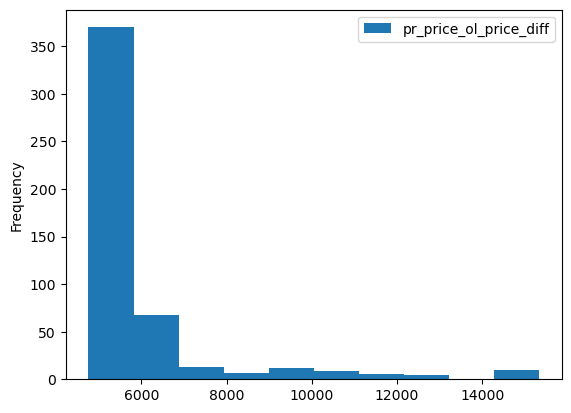

In [288]:
# discounts
(
    ol_pr_df.groupby('id_order')
    .agg({'pr_price_ol_price_diff':'mean'})
    .nlargest(500,'pr_price_ol_price_diff')
    .plot.hist()
)
# note: 
# discounts happening at x-axis
# more quantities are ordered for lower discounts
# top 10 largest orders had a unit_price/product_price diff of 957 
# outliers: (500 - 950) very high discounts
# high discount peaks should be explained by looking at date (holidays)
# chart should be converted to percentage of discount to improve readability

In [307]:
# manual test orderline[unit_price] to prod[price]
(
    ol_pr_df.query('unit_price== 0 & in_stock ==0')
    .groupby(['id_order','unit_price','sku','price','promo_price'])
    .agg({'pr_price_ol_price_diff':'mean'})
    .nlargest(10,'pr_price_ol_price_diff')

)
# out of stock items

,,,,,pr_price_ol_price_diff
id_order,unit_price,sku,price,promo_price,
487164,0.00,APP2660,15339.00,0.00,15339.00
487192,0.00,APP2660,15339.00,0.00,15339.00
487490,0.00,APP2660,15339.00,0.00,15339.00
488935,0.00,APP2660,15339.00,0.00,15339.00
491691,0.00,APP2660,15339.00,0.00,15339.00
497375,0.00,APP2660,15339.00,0.00,15339.00
500546,0.00,APP2660,15339.00,0.00,15339.00
501275,0.00,APP2660,15339.00,0.00,15339.00
501413,0.00,APP2660,15339.00,0.00,15339.00


In [512]:
# manual test revenue per orderline
(
    ol_pr_df.query('unit_price>0 & product_quantity==1')
    .groupby(['id_order','unit_price','sku','price','promo_price'])
    .agg({'pr_price_ol_price_diff':'mean'})
    .nlargest(10,'pr_price_ol_price_diff')

)


,,,,,pr_price_ol_price_diff
id_order,unit_price,sku,price,promo_price,
496269,6.59,APP2674,7179.00,0.00,7172.41
471754,6.59,PAC2115,4639.00,0.00,4632.41
502820,6.59,PAC2148,4519.00,0.00,4512.41
473692,6.59,PAC2142,4285.59,0.00,4279.00
435482,5.45,APP2348,3999.00,0.00,3993.55
455322,6.59,APP2348,3999.00,0.00,3992.41
460673,6.59,APP2348,3999.00,0.00,3992.41
460679,6.59,APP2348,3999.00,0.00,3992.41
460683,6.59,APP2348,3999.00,0.00,3992.41


In [ ]:
# create discount_rate column
# discount_rate <- diff/price
ol_pr_df.loc[:,'discount_rate']=ol_pr_df['pr_price_ol_price_diff']/ol_pr_df['price']



In [563]:
ol_pr_df.loc[(ol_pr_df['product_quantity']==1)&(ol_pr_df['discount_rate']<.80)].agg({'discount_rate':'mean'})

discount_rate   0.18
dtype: float64

In [543]:
# price of items with 99% discount
(
    ol_pr_df.loc[ol_pr_df['discount_rate']>.99]
    .groupby(['sku'])
    .agg({'price':'mean'})
    .nlargest(10,'price')
)

,price
sku,
APP2660,15339.00
APP2659,14379.00
APP2648,12939.00
APP2694,12699.00
APP2684,12219.00
APP2647,11979.00
APP2672,11979.00
PAC0874,11129.00
APP2644,11019.00


In [323]:
display(ol_df.loc[ol_df['id_order']=='487164'])
display(ol_df.loc[ol_df['id_order']=='394981'])
display(ol_df.loc[ol_df['id_order']=='448053'])
display(or_df.query('total_paid>10000 & state=="Shopping Basket"').count())
display(or_df.query('total_paid>10000 & state=="Place Order"').count())
display(or_df.query('total_paid>10000 & state=="Completed"'))



,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
232052,1551007,487164,0,1,APP2660,0.00,2018-01-09 23:33:16,0.00


,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
110806,1329562,394981,0,1,PAC2136,0.00,2017-08-31 12:16:11,0.00
110814,1329583,394981,0,3,APP2365,0.00,2017-08-31 12:31:03,0.00
110818,1329590,394981,0,1,APP2264,0.00,2017-08-31 12:33:08,0.00


,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
174052,1457614,448053,0,3,PAC1950,0.00,2017-11-27 12:57:59,0.00


id_order        184
created_date    184
total_paid      184
state           184
dtype: int64

id_order        27
created_date    27
total_paid      27
state           27
dtype: int64

,id_order,created_date,total_paid,state
95399,394981,2017-08-31 13:09:05,10586.97,Completed
147938,448053,2017-11-27 12:59:51,13387.78,Completed


In [290]:
( # orderline unit_price to product_price disparity
    ol_pr_df.query('unit_price>0 & promo_price == 0')
    .groupby(['id_order','unit_price','sku','promo_price','pr_price_ol_price_diff'])
    .agg({'price':'mean'})
    .nlargest(10,'price')
)
# note: promo price applied high discount-> shipping fees

,,,,,price
id_order,unit_price,sku,promo_price,pr_price_ol_price_diff,
496269,6.59,APP2674,0.00,7172.41,7179.00
471754,6.59,PAC2115,0.00,4632.41,4639.00
502820,6.59,PAC2148,0.00,4512.41,4519.00
473692,6.59,PAC2142,0.00,4279.00,4285.59
435482,5.45,APP2348,0.00,3993.55,3999.00
455322,6.59,APP2348,0.00,3992.41,3999.00
460673,6.59,APP2348,0.00,3992.41,3999.00
460679,6.59,APP2348,0.00,3992.41,3999.00
460683,6.59,APP2348,0.00,3992.41,3999.00


In [302]:
( # orderline unit_price to product_price disparity
    ol_pr_df.query('unit_price> price & product_quantity >0 & promo_price > 0')
    .groupby(['id_order','unit_price','sku','product_quantity','unit_price_total','promo_price','pr_price_ol_price_diff'])
    .agg({'price':'mean'})
    .nlargest(10,'price')
)
# promo price applied no discount, normal fees, taxes, no revenue

,,,,,,,price
id_order,unit_price,sku,product_quantity,unit_price_total,promo_price,pr_price_ol_price_diff,
361159,999.00,BNQ0057,1,999.00,990.00,0.00,990.00
302436,909.00,LGE0031,2,1818.00,809.00,0.00,899.00
304063,909.00,LGE0031,1,909.00,809.00,0.00,899.00
306720,909.00,LGE0031,1,909.00,809.00,0.00,899.00
307747,909.00,LGE0031,3,2727.00,809.00,0.00,899.00
311921,909.00,LGE0031,1,909.00,809.00,0.00,899.00
311924,909.00,LGE0031,1,909.00,809.00,0.00,899.00
317728,899.99,LGE0031,1,899.99,809.00,0.00,899.00
374347,902.81,APP2123,1,902.81,872.00,0.00,899.00


In [301]:
( # orderline unit_price per product_price disparity
    ol_pr_df.query('unit_price>0 & promo_price > 0')
    .groupby(['id_order','unit_price','sku','product_quantity','unit_price_total','promo_price','pr_price_ol_price_diff'])
    .agg({'price':'mean'})
    .nlargest(10,'price')
)
# note: 50%-90% discount, marginal discount

,,,,,,,price
id_order,unit_price,sku,product_quantity,unit_price_total,promo_price,pr_price_ol_price_diff,
357300,499.00,PAC2065,3,1497.00,499.00,1300.00,1799.00
357302,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00
357309,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00
357311,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00
357316,499.00,PAC2065,10,4990.00,499.00,1300.00,1799.00
357338,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00
357339,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00
357370,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00
357379,499.00,PAC2065,1,499.00,499.00,1300.00,1799.00


In [ ]:
# 3.5 ### Can all the differences be explained by shipping costs? 
# If not, what are other plausible explanations?
# scatterplot different factors



In [ ]:
# 3.5 ### If there are differences that you can’t explain: what should you do with these orders?
# some orderlines have 0 unit price
# see:


In [252]:
display(ol_df[ol_df['sku']=='APP1582'].head(5))
display(pr_df[pr_df['sku']=='APP1582'])
display(or_df[or_df['id_order']=='302038'])


,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119115,299544,0,1,APP1582,0.00,2017-01-01 01:17:21
2761,1125963,302038,0,1,APP1582,0.00,2017-01-03 21:27:10
2775,1126354,302050,0,1,APP1582,0.00,2017-01-03 21:43:12
3329,1130117,302584,0,1,APP1582,0.00,2017-01-04 16:44:55
3467,1130359,302718,0,1,APP1582,0.00,2017-01-04 19:59:34


,sku,name,desc,price,promo_price,in_stock,type,short,brand
12209,APP1582,"Apple MacBook Air 13 ""i7 22 Ghz | 8GB RAM | 12...",laptop MacBook Air 13 inch i7 22GHz 8GB RAM 12...,1219.00,0.00,0,1282.00,APP,Apple


,id_order,created_date,total_paid,state
2580,302038,2017-01-03 21:27:10,1234.97,Place Order


In [253]:
display(ol_df[ol_df['sku']=='APP2674'])
display(pr_df[pr_df['sku']=='APP2674'])
display(or_df[or_df['id_order']=='496269'])

,id,id_order,product_id,product_quantity,sku,unit_price,date
246146,1574475,496267,0,1,APP2674,0.00,2018-01-22 18:07:38
246149,1574478,496269,0,1,APP2674,6.59,2018-01-22 18:07:59
283945,1635466,521207,0,1,APP2674,0.00,2018-03-05 09:59:15


,sku,name,desc,price,promo_price,in_stock,type,short,brand
18443,APP2674,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,7179.00,0.00,0,118692158.00,APP,Apple


,id_order,created_date,total_paid,state
195786,496269,2018-01-22 18:07:59,6.59,Shopping Basket


In [300]:

display(or_df[or_df['id_order']=='307747'])
display(ol_df[ol_df['id_order']=='307747'])



,id_order,created_date,total_paid,state
8277,307747,2017-01-12 04:50:55,2727.00,Shopping Basket


,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
8979,1142099,307747,0,3,LGE0031,909.00,2017-01-12 04:50:55,2727.00


In [ ]:
# 3.5 5.; Become confident about your dataset
# actions: 
# 1. promo price is : one decimal off or mislabeled
# 2. drop orderlines.product_id in favor of sku
# 3. high orders occur in summer (april - june) and holidays (nov - mar)

In [ ]:
# Analyze discounts
# Discounts are defined as the difference between orderlines.unit_price and products.price. 
# Merging both tables and creating a column that contains the discount is, thus, probably a good idea. 
# merge ol + pr , groupby orderlines.unit_price, pr.price.sum()
# products.discount = pr.price - ol.unit_price
print(type(pr_df.price - ol_df.unit_price))

In [364]:
import matplotlib.pyplot as plt

import seaborn as sns

<AxesSubplot:xlabel='unit_price', ylabel='price'>

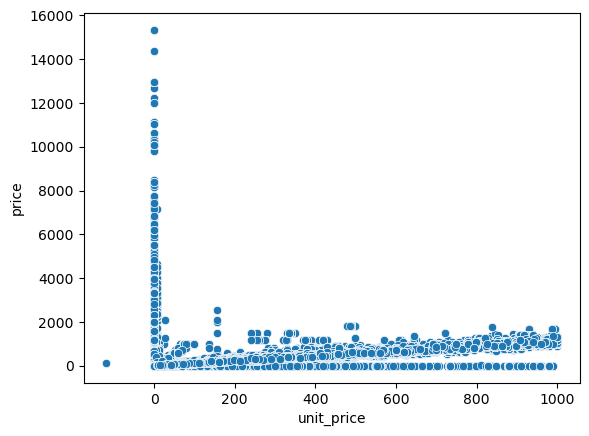

In [325]:
# 3.6
## Challenge 2:
# Create a scatter plot to explore the relationship between the 
# recommended price for a product (`products.price`) and the price that 
# products actually sold for (`orderlines.unit_price`)

# Hint: You don't need to groupby here. Just bring a couple of tables together and then use seaborn.


sns.scatterplot(data=ol_pr_df, x='unit_price', y='price')



In [ ]:
# note: 
# 0 unitprice-price -> no revenue
# high-priced items are significantly discounted
# items priced ~2000 have revenue


<AxesSubplot:xlabel='created_date', ylabel='total_paid'>

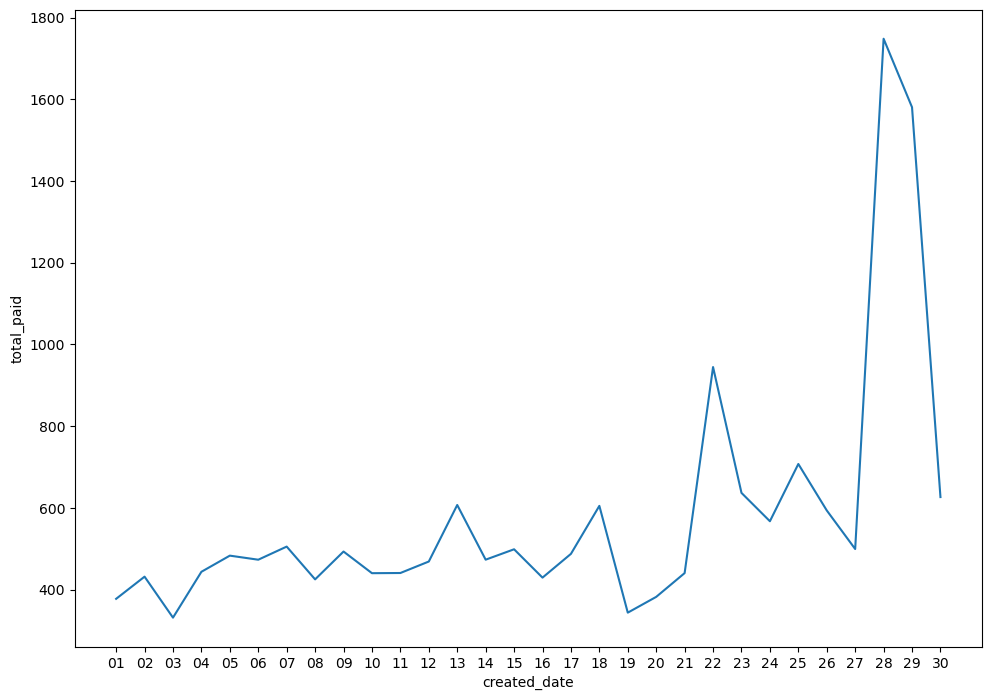

In [354]:
# 3.6
## Challenge 3:
# Let's investigate when customers like to spend more money. 
# Display the average daily price of an order on a line plot.

# Hint: first work on finding the daily average of `total_paid`, 

fig, ax = plt.subplots(figsize=(11.7, 8.27))

df = (
    or_df
    .loc[(or_df.created_date.dt.strftime('%Y-%m') == '2017-11')]
    .groupby(or_df['created_date'].dt.strftime('%d'))
    .agg({'total_paid':'mean'})
    # .plot()
)
sns.lineplot(data=df, x="created_date", y="total_paid",ax=ax)
# plt.plot()

,product_quantity
sku,
PAC1239,1008
PAC1628,605
PAC1067,570
APP0698,552
PAC1035,522
PAC1240,441
APP1195,429
PAC1594,352
APP1810,343


,product_quantity
sku,
MIC0036,2697
APP1216,2447
APP0662,2252
APP1199,1024
APP1190,842
PAC0960,704
PAC0962,608
APP0663,579
ZAG0036,417


Text(0.5, 1.0, 'January 2018')

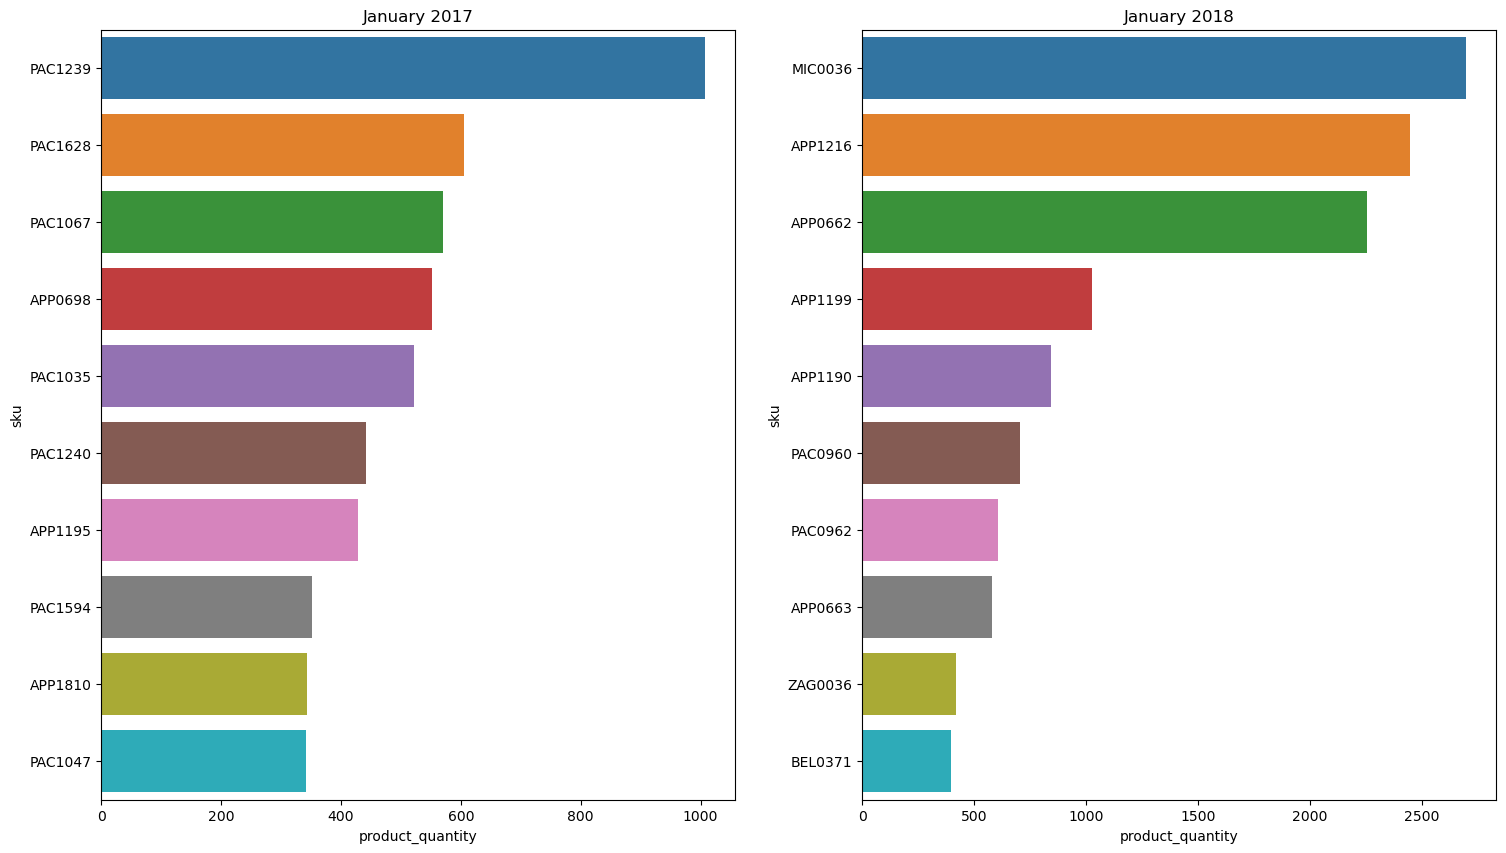

In [412]:
## Challenge 4:
# Make a bar plot for the top 10 products sold in 
# January 2017 & the top 10 products sold in January 2018.

df1 = (
    ol_pr_df
    .loc[(ol_pr_df.date.dt.strftime('%Y-%m') == '2017-01')]
    .groupby('sku',as_index=True)
    .agg({'product_quantity':'sum'})
    .sort_values(by='product_quantity',ascending=False)
    .nlargest(10,'product_quantity')

)

df2 = (
    ol_pr_df
    .loc[(ol_pr_df.date.dt.strftime('%Y-%m') == '2018-01')]
    .groupby('sku',as_index=True)
    .agg({'product_quantity':'sum'})
    .sort_values(by='product_quantity',ascending=False)
    .nlargest(10,'product_quantity')
)
display(df1)
display(df2)
# plt.subplots(row,col)
fig, axes = plt.subplots(1,2, figsize=(18, 10))

sns.barplot(data = df1 ,ax=axes[0], y=df1.index, x='product_quantity')
sns.barplot(data = df2 ,ax=axes[1], y=df2.index, x='product_quantity')

# https://stackoverflow.com/questions/59305648/seaborn-is-there-a-better-way-to-wrap-the-text-in-my-bar-plot
# ax.set_yticklabels(df1['desc'].head())

axes[0].set_title('January 2017')
axes[1].set_title('January 2018')

<AxesSubplot:xlabel='brand,date'>

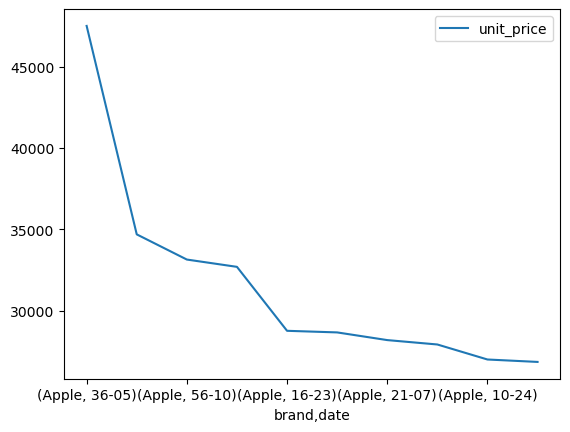

In [397]:
# 3.6
## Bonus
# Find the top 10 brands that have generated the most revenue 
# in the snapshot we have. 
# Show the daily revenue generated by each of these brands on a line plot, 
# use a seperate line for each brand.
# ol_pr[brand] 
(
    ol_pr_df
    .groupby(['brand',ol_pr_df.date.dt.strftime('%M-%d')])
    .agg({'unit_price':'sum'})
    .nlargest(10,'unit_price')
    .plot.line()
)


<AxesSubplot:xlabel='created_date', ylabel='total_paid'>

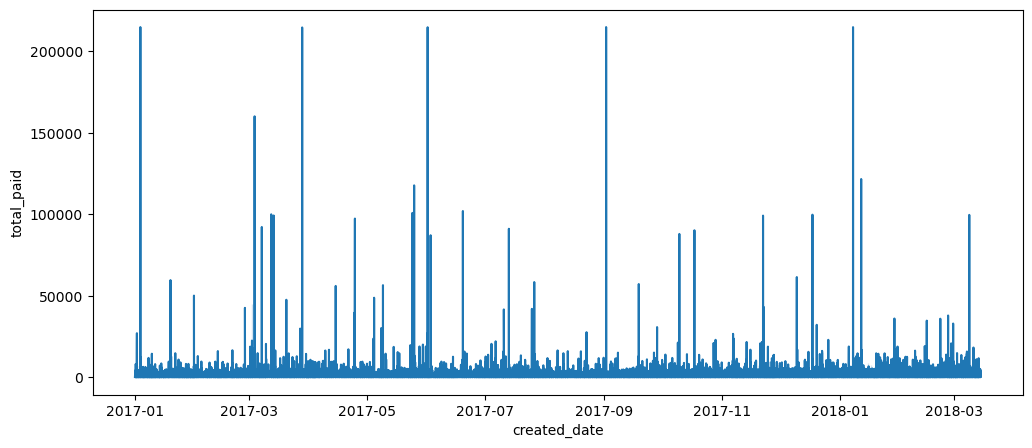

In [491]:
# user activity 2017-2018

fig, ax = plt.subplots(figsize=(12, 5))

df = (
    or_df
    # .loc[(or_df.created_date.dt.strftime('%Y') == '2017')]
    .groupby(or_df['created_date'].dt.month)
    # .agg({'total_paid':'mean'})
    .value_counts()
)
# display(df)
sns.lineplot(data=df, x="created_date", y="total_paid",ax=ax)

In [529]:
# or_df.loc[or_df['total_paid']>50000].groupby('created_date').count()

<AxesSubplot:xlabel='created_date', ylabel='total_paid'>

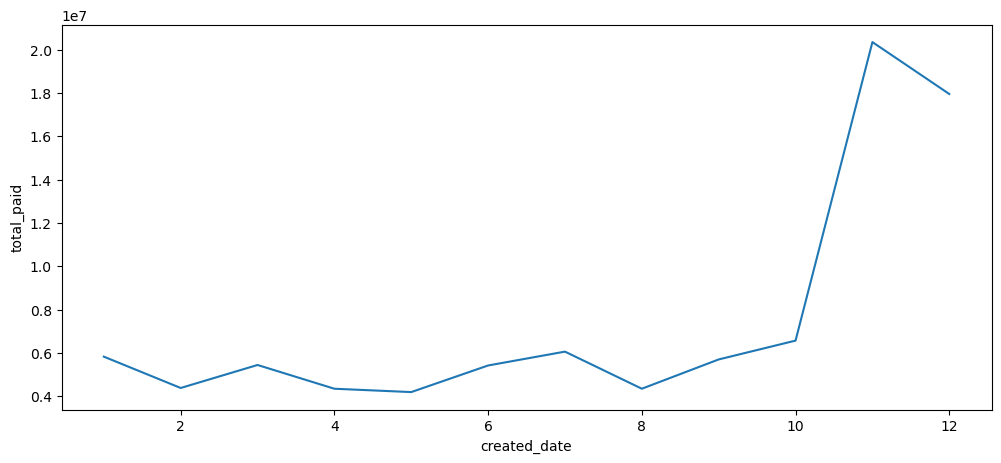

In [592]:
# avg monthly sales in 2017

fig, ax = plt.subplots(figsize=(12, 5))

df = (
    or_df
    .loc[(or_df.created_date.dt.strftime('%Y') == '2017')]
    .groupby(or_df['created_date'].dt.month)
    .agg({'total_paid':'sum'})
)
# display(df)
sns.lineplot(data=df, x="created_date", y="total_paid",ax=ax)

In [ ]:
# 2018
fig, ax = plt.subplots(figsize=(11.7, 8.27))

df = (
    or_df
    .loc[(or_df.created_date.dt.strftime('%Y') == '2018')]
    .groupby(or_df['created_date'].dt.month)
    .agg({'total_paid':'mean'})
)
display(df)
# sns.lineplot(data=df, x="created_date", y="total_paid",ax=ax)

In [ ]:
# df.set_index('category').T.plot(kind='bar', stacked=True)

In [515]:
(
    ol_pr_df
    .loc[(ol_pr_df.date.dt.strftime('%Y-%m') == '2017-01')]
    .groupby(['desc','type'],as_index=True)
    .agg({'product_quantity':'sum'})
    .sort_values(by='product_quantity',ascending=False)
    .nlargest(10,'product_quantity')

)

,,product_quantity
desc,type,
IMac desktop computer 27 inch 5K Retina 64GB SSD RAM 2TB (MK482Y / A).,0.00,1008
Apple MacBook Pro 133 inches (MD101Y / A) with extended RAM and SSD.,1282.00,612
IMac desktop computer 27 inch Retina 5K 4GHz Core i7 | 32GB RAM | 2TB SSD | R9 M395X 4GB (MK482Y / A),0.00,605
IMac desktop computer 27 inch 5K Retina i7 4GHz 512GB Flash RAM 32GB R9 M395X 4GB (MK482Y / A).,0.00,570
Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,1230.00,552
IMac desktop computer 27 inch 5K Retina 4GHz i7 RAM 32GB 2TB Fusion (MK482Y / A).,0.00,522
IMac desktop computer 215 inch 8GB RAM 1TB HDD (MK142Y / A).,1282.00,462
IMac desktop computer 27 inch 8GB RAM 2TB 5K Retina Fusion (MK482Y / A).,0.00,456
Desktop computer iMac 27-inch 3.2GHz Core i5 5K Retina | 32GB RAM | 1TB SSD | AMD Radeon R9 M390 (MK472Y / A),0.00,352


In [ ]:
# decision tree rules

In [447]:
# mac not cable
pr_df.loc[(pr_df.desc.str.contains('Apple Care extended warranty iPhone.'))&(pr_df.type == 1231)].count()


sku            1
name           1
desc           1
price          1
promo_price    1
in_stock       1
type           1
short          1
brand          1
dtype: int64

In [446]:
# charger-13615399.00
(
    pr_df.loc[(pr_df.desc.str.contains('charger'))&(pr_df.type == 13615399.00)]
    .count()
)


sku            34
name           34
desc           34
price          34
promo_price    34
in_stock       34
type           34
short          34
brand          34
dtype: int64

In [488]:
# memory-1364
(
pr_df.loc[(pr_df.desc.str.contains('memory'))|(pr_df.type == 1364)]
.count()
)

sku            715
name           715
desc           715
price          715
promo_price    715
in_stock       715
type           715
short          713
brand          713
dtype: int64

In [485]:
(
pr_df.loc[(pr_df.desc.str.lower().str.contains('mac'))]
    .count()
)

sku            13538
name           13538
desc           13538
price          13538
promo_price    13538
in_stock       13538
type           13538
short          13492
brand          13492
dtype: int64

In [483]:
# wireless headphones-5384
(
pr_df.loc[(pr_df.desc.str.lower().str.contains('cable'))]
    # .head(5)
.count()
)


sku            398
name           398
desc           398
price          398
promo_price    398
in_stock       398
type           398
short          387
brand          387
dtype: int64

In [448]:
pr_df.loc[pr_df.desc.str.contains('desktop')].count()

sku            5943
name           5943
desc           5943
price          5943
promo_price    5943
in_stock       5943
type           5943
short          5943
brand          5943
dtype: int64

In [449]:
pr_df.loc[pr_df.desc.str.contains('laptop')].count()

sku            91
name           91
desc           91
price          91
promo_price    91
in_stock       91
type           91
short          91
brand          91
dtype: int64

In [ ]:
# cases 13835403.00
# storage 1433 or 'SSD'
# accessories 12585395.00
# bags 1392

In [531]:
pr_df.loc[(pr_df.type=='1433')|pr_df.desc.str.contains('SSD')].count()


sku            4238
name           4238
desc           4238
price          4238
promo_price    4238
in_stock       4238
type           4238
short          4237
brand          4237
category       4238
dtype: int64

In [479]:
pr_df.loc[pr_df.desc.str.contains('acbook')| (pr_df.desc.str.contains('laptop'))].count() # not desktop
# pr_df.loc[pr_df.desc.str.contains('acbook')| (pr_df.desc.str.contains('laptop'))]

sku            282
name           282
desc           282
price          282
promo_price    282
in_stock       282
type           282
short          278
brand          278
dtype: int64

In [465]:
pr_df.loc[pr_df.desc.str.contains('monitor')].count() # not mac, no keyboard

sku            167
name           167
desc           167
price          167
promo_price    167
in_stock       167
type           167
short          155
brand          155
dtype: int64

In [466]:
pr_df.loc[pr_df.desc.str.contains('tablet')].count() # mobile

sku            81
name           81
desc           81
price          81
promo_price    81
in_stock       81
type           81
short          81
brand          81
dtype: int64

In [467]:
pr_df.loc[pr_df.desc.str.contains('cable')].count() # needs battery

sku            228
name           228
desc           228
price          228
promo_price    228
in_stock       228
type           228
short          227
brand          227
dtype: int64

In [ ]:
# pr_df.loc[pr_df.desc.str.contains('pointer')].head(3) # handheld

In [573]:
# create category mega function
pr_df.loc[pr_df.desc.str.contains('cable'),"category"] = "cable"
pr_df.loc[pr_df.desc.str.contains('tablet'),'category'] = 'tablet'

pr_df.loc[pr_df.desc.str.contains('monitor'),'category'] = 'monitor'

pr_df.loc[pr_df.desc.str.contains('laptop'),'category'] = 'laptop'

pr_df.loc[pr_df.type==5384,'category'] = 'audio'

pr_df.loc[(pr_df.type=='1433')|pr_df.desc.str.contains('SSD'),'category'] = 'memory'

pr_df.loc[pr_df.desc.str.contains('charger'),'category'] = 'charger'

pr_df.loc[pr_df.desc.str.contains('desktop'),'category'] = 'desktop'

pr_df.loc[pr_df.type==1392,'category'] = 'bags'

pr_df.loc[pr_df.type==13835403,'category'] = 'cases'

pr_df.loc[pr_df.type==12585395,'category'] = 'accessories'


cat_df= ol_df.merge(pr_df,on='sku',how='left')

print('product table: %i'%(pr_df['sku'].count()))
print('orderline table: %i'%(ol_df['id'].count()))
print('ol + cat table: %i'%(cat_df['id'].count()))
display(pr_df['category'].value_counts())
display(cat_df['category'].value_counts())
display(cat_df.info())

product table: 19326
orderline table: 293983
ol + cat table: 379815


desktop        5943
memory         3090
cases           271
cable           195
accessories     190
audio           182
monitor         165
tablet           78
laptop           67
bags             65
charger          55
Name: category, dtype: int64

memory         68389
desktop        52302
accessories     9780
audio           8855
cases           6877
cable           5730
tablet          4913
monitor         3721
charger         2012
bags            1946
laptop           635
Name: category, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379815 entries, 0 to 379814
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                379815 non-null  int64         
 1   id_order          379815 non-null  string        
 2   product_id        379815 non-null  int64         
 3   product_quantity  379815 non-null  int64         
 4   sku               379815 non-null  object        
 5   unit_price        379815 non-null  float64       
 6   date              379815 non-null  datetime64[ns]
 7   unit_price_total  379815 non-null  float64       
 8   name              378397 non-null  object        
 9   desc              378397 non-null  object        
 10  price             378397 non-null  float64       
 11  promo_price       378397 non-null  float64       
 12  in_stock          378397 non-null  float64       
 13  type              378397 non-null  float64       
 14  shor

None

In [ ]:
cat_df.loc[(cat_df['pr_price_ol_price_diff']<0)&(cat_df['category']=='desktop')].count()

In [607]:
cat_df.loc[:,'pr_price_ol_price_diff'] = cat_df['price'] - cat_df['unit_price']
cat_df.loc[cat_df['pr_price_ol_price_diff']<0,'category'] = 'no_discount'
cat_df.loc[cat_df['pr_price_ol_price_diff']<0,'pr_price_ol_price_diff'] = 0
not_discounted_ol = cat_df.loc[cat_df['category']=='no_discount']['id'].count()
ol_total = cat_df['id'].count()
print('number of non-discounted orderlines: %i '%(not_discounted_ol))
print('orderlines total: %i'%(ol_total))
print('discounted orderlines rate %f'%((not_discounted_ol/ol_total)*100))

number of non-discounted orderlines: 13607 
orderlines total: 379815
discounted orderlines rate 3.582534


<AxesSubplot:xlabel='discount_rate', ylabel='category'>

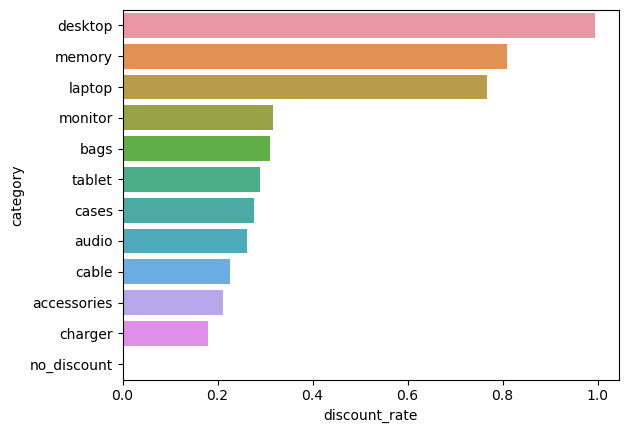

In [596]:
# discount rate of items with 80% and less discount

cat_df.loc[:,'discount_rate']=cat_df['pr_price_ol_price_diff']/cat_df['price']


df=(
    # cat_df.loc[(cat_df['product_quantity']==1)&(cat_df['discount_rate']<.80)]
    cat_df.loc[(cat_df['product_quantity']==1)]
    .groupby(['category'],as_index=True)
    .agg({'discount_rate':'mean'})
    .nlargest(20,'discount_rate')
)

# df
sns.barplot(data=df, y=df.index, x='discount_rate')

# note: reasonable discount with some revenue

<AxesSubplot:xlabel='price', ylabel='category'>

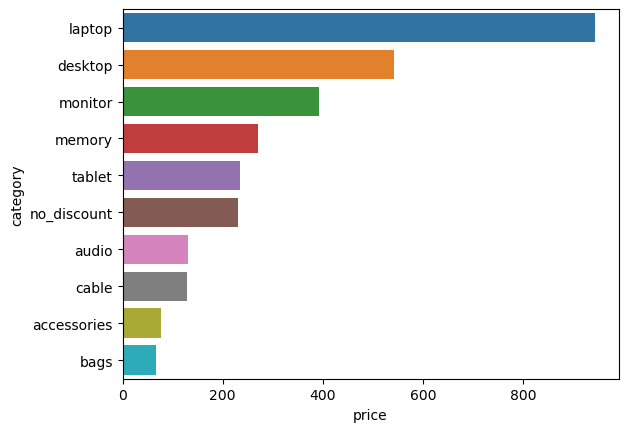

In [597]:
df2=(
    cat_df.loc[(cat_df['product_quantity']==1)&(cat_df['discount_rate']<.80)]
    .groupby(['category'],as_index=True)
    .agg({'price':'mean'})
    .nlargest(10,'price')
)

# df
sns.barplot(data=df2, y=df2.index, x='price')

[None]


<AxesSubplot:xlabel='price', ylabel='category'>

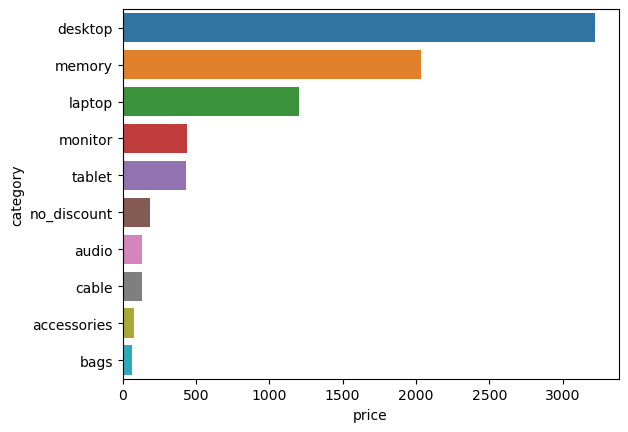

In [627]:
df3=(
    # cat_df.loc[(cat_df['product_quantity']==1)&(cat_df['discount_rate']>.80)]
    cat_df.loc[(cat_df['product_quantity']==1)]
    .groupby(['category'],as_index=True)
    .agg({'price':'mean'})
    .nlargest(10,'price')
)

# print(cat_df.index.names)
sns.barplot(data=df3, y=df3.index, x='price')

In [636]:
df3=(
    # cat_df.loc[(cat_df['product_quantity']==1)&(cat_df['discount_rate']>.80)]
    cat_df.loc[(cat_df['category']=='monitor')|(cat_df['category']=='desktop')|(cat_df['category']=='laptop')]
    .groupby(['category'],as_index=True)
    .agg({'unit_price_total':'sum'})
    .nlargest(10,'unit_price_total')
)
df3

,unit_price_total
category,
monitor,1006033.45
desktop,174544.06
laptop,140835.68


In [637]:
df4=(
    # cat_df.loc[(cat_df['product_quantity']==1)&(cat_df['discount_rate']>.80)]
    # cat_df.loc[(cat_df['category']=='monitor')|(cat_df['category']=='desktop')|(cat_df['category']=='laptop')]
    cat_df
    # .groupby(['category'],as_index=True)
    .agg({'unit_price_total':'sum'})
    # .nlargest(10,'unit_price_total')
)
df5=(
    # cat_df.loc[(cat_df['product_quantity']==1)&(cat_df['discount_rate']>.80)]
    cat_df.loc[(cat_df['category']=='monitor')|(cat_df['category']=='desktop')|(cat_df['category']=='laptop')]
    # .groupby(['category'],as_index=True)
    .agg({'unit_price_total':'sum'})
    # .nlargest(10,'unit_price_total')
)
print('total sales top 3 : %f'%(df5[0]))
print('total sales: %f'%(df4[0]))

total sales top 3 : 1321413.190000
total sales: 46463779.750000


In [635]:
print((df5/df4)*100)
# highest selling items only consist of ~3% of total sales

unit_price_total   2.84
dtype: float64


In [ ]:
# How products should be classified into different categories to simplify reports and analysis.
# What is the distribution of product prices across different categories.
# How many products are being discounted.
# How big are the offered discounts as a percentage of the product prices.
# How seasonality and special dates (Christmas, Black Friday) affect sales.
# How could data collection be improved

In [463]:
pr_df.nunique()

sku            10579
name           10373
desc            7099
price           2420
promo_price     1615
in_stock           2
type             114
short            184
brand            180
dtype: int64